In [37]:
import pandas as pd
from ydata_profiling import ProfileReport

# Full Data ProfileReport EDA On ResaleFlatPrices

In [4]:
FOLDER_PATH = "C:/Users/weiji/National University of Singapore/MTech Y1S2 - General/Dataset/"
DATA_PATH = "C:/Users/weiji/National University of Singapore/MTech Y1S2 - General/Dataset/Resaleflatprices.csv"
OUTPUT_PATH_pdReport = FOLDER_PATH + 'ProfileReport.html'

df = pd.read_csv(DATA_PATH)

df_filtered = df

profile = ProfileReport(df_filtered, title='EDA First Overall Draft')
profile.config.html.style.primary_colors = ['#9A2782', '#e41a1c', '#4daf4a']
profile.to_file(OUTPUT_PATH_pdReport)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Extracting Google Maps - Geolocation

In [3]:
# Setting up google Map with API Key
API_key = '###'
gmaps = googlemaps.Client(key=API_key)

In [3]:
# Setting up input File
FOLDER_PATH = "C:/Users/weiji/National University of Singapore/MTech Y1S2 - General/Dataset/"
DATA_PATH = f"{FOLDER_PATH}/Resaleflatprices.csv"
df = pd.read_csv(DATA_PATH)

In [34]:
df.query('full_address == "308A PUNGGOL WALK"').sort_values('month')

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
69994,2020-04,PUNGGOL,5 ROOM,308A,PUNGGOL WALK,04 TO 06,112.0,Premium Apartment,2016,95 years,688000.0,308A PUNGGOL WALK
70387,2020-05,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,16 TO 18,92.0,Premium Apartment,2016,94 years 10 months,565000.0,308A PUNGGOL WALK
72014,2020-06,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,16 TO 18,92.0,Premium Apartment,2016,94 years 10 months,555000.0,308A PUNGGOL WALK
74336,2020-07,PUNGGOL,3 ROOM,308A,PUNGGOL WALK,07 TO 09,67.0,Premium Apartment,2016,94 years 09 months,435000.0,308A PUNGGOL WALK
74337,2020-07,PUNGGOL,3 ROOM,308A,PUNGGOL WALK,04 TO 06,67.0,Premium Apartment,2016,94 years 09 months,380000.0,308A PUNGGOL WALK
...,...,...,...,...,...,...,...,...,...,...,...,...
144928,2023-01,PUNGGOL,5 ROOM,308A,PUNGGOL WALK,07 TO 09,112.0,Premium Apartment,2016,92 years 03 months,777000.0,308A PUNGGOL WALK
149065,2023-03,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,13 TO 15,92.0,Premium Apartment,2016,92 years,646500.0,308A PUNGGOL WALK
151370,2023-04,PUNGGOL,5 ROOM,308A,PUNGGOL WALK,10 TO 12,112.0,Premium Apartment,2016,92 years,790000.0,308A PUNGGOL WALK
151298,2023-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,04 TO 06,92.0,Premium Apartment,2016,92 years,610000.0,308A PUNGGOL WALK


# Preprocessing

In [4]:
df['full_address'] = df['block'] + ' '+ df['street_name']

In [5]:
df.town.value_counts().to_frame()

,town
SENGKANG,13099
PUNGGOL,11565
WOODLANDS,10963
YISHUN,10699
TAMPINES,10439
JURONG WEST,10220
BEDOK,8374
HOUGANG,7646
CHOA CHU KANG,7146
ANG MO KIO,6473


In [ ]:
INTERESTED_TOWN = 'PUNGGOL'
df_filtered = df.query('town == "PUNGGOL"')

## Get Location

In [11]:
geocode_output = []
for addr in df_filtered.full_address.unique():
    o = gmaps.geocode(addr)[0]
    geocode_output.append({
        'addr': addr,
        'geocode_full_addr': o['formatted_address'],
        'geocode_lat':o['geometry']['location']['lat'],
        'geocode_long':o['geometry']['location']['lng'],
        'place_id':o['place_id'],
        'output':o
    })

In [14]:
# Save Location
geocode_df = pd.DataFrame(geocode_output)
geocode_df.to_excel("geocode_output.xlsx", index=False)

In [ ]:
geocode_df = pd.read_excel("geocode_output.xlsx")

In [15]:
geocode_df.head()

,addr,geocode_full_addr,geocode_lat,geocode_long,place_id,output
0,406 ANG MO KIO AVE 10,"406 Ang Mo Kio Ave 10, Block 406, Singapore 56...",1.362033,103.853827,ChIJn0ryBh0X2jERDWwOYYqMArI,{'address_components': [{'long_name': 'Block 4...
1,108 ANG MO KIO AVE 4,"108 Ang Mo Kio Ave 4, Singapore 560108",1.370915,103.838246,ChIJUSsYndsW2jERsGN3H08PU0U,"{'address_components': [{'long_name': '108', '..."
2,602 ANG MO KIO AVE 5,"602 Ang Mo Kio Ave 5, Block 602, Singapore 560602",1.380715,103.835302,ChIJr34ssscW2jERwMW28VyQdNA,{'address_components': [{'long_name': 'Block 6...
3,465 ANG MO KIO AVE 10,"465 Ang Mo Kio Ave 10, Block 465, Singapore 56...",1.366263,103.856997,ChIJ_YcRKP0W2jERudNDz0wktus,{'address_components': [{'long_name': 'Block 4...
4,601 ANG MO KIO AVE 5,"601 Ang Mo Kio Ave 5, Singapore 560601",1.381074,103.835135,ChIJYUq2t8cW2jERCnI-HaVx7mM,"{'address_components': [{'long_name': '601', '..."


## Get Ammenties

In [6]:
geocode_df = pd.read_excel("sample1-punggol/geocode_output.xlsx")

In [24]:
TYPE_OF_AMMENTIES = 'shopping_mall' #Restuarant, Shopping_mall, Primary_School, Secondary_School, Supermarket

output = []
for idx, r in geocode_df.iterrows():

    a = gmaps.places(TYPE_OF_AMMENTIES, location=r[['geocode_lat','geocode_long']].to_list(), radius=500, type=TYPE_OF_AMMENTIES)
    INTERESTED_VARS = ['business_status','formatted_address','name','place_id','rating','user_ratings_total']

    def get_location(a):
        return {
            'lat' : a['geometry']['location']['lat'],
            'long': a['geometry']['location']['lng']
        }
    for fp in a['results']:
        t = {}
        for iv in INTERESTED_VARS:
            t[iv] = fp.get(iv)
        t.update(get_location(fp))
        t.update({'source_lat':r.geocode_lat,'source_long':r.geocode_long,'addr':r.addr})
        output.append(t)

In [25]:
place_df = pd.DataFrame(output)
place_df.to_excel(f"{TYPE_OF_AMMENTIES}.xlsx", index=False)

## Get Review

In [26]:
place_df.drop_duplicates(subset=['place_id'])

,business_status,formatted_address,name,place_id,rating,user_ratings_total,lat,long,source_lat,source_long,addr
0,OPERATIONAL,"11 Rivervale Cres, Singapore 545082",Rivervale Mall,ChIJmQIrNAUW2jER6VgPAnslDhU,3.9,3076,1.392262,103.904446,1.398097,103.903683,203B PUNGGOL FIELD
1,OPERATIONAL,"70 Compassvale Bow, Singapore 544692",Sengkang Grand Mall,ChIJd9qV0EsX2jERBr9KvwpfBUI,3.8,459,1.382841,103.892412,1.398097,103.903683,203B PUNGGOL FIELD
2,OPERATIONAL,"90 Hougang Ave 10, Singapore 538766",Hougang Mall,ChIJTzOjnDcW2jERHyoyj5LFmQ4,4.0,6930,1.372589,103.893722,1.398097,103.903683,203B PUNGGOL FIELD
3,OPERATIONAL,"407 Northshore Dr, Singapore 820407",Northshore Plaza I,ChIJ2zKcVvgV2jERBUF__KyDaws,4.2,936,1.417118,103.901719,1.398097,103.903683,203B PUNGGOL FIELD
4,OPERATIONAL,"4 Tampines Central 5, Singapore 529510",Tampines Mall,ChIJ89lf6hE92jERQXt7c5QOFnY,4.3,13570,1.352451,103.944673,1.398097,103.903683,203B PUNGGOL FIELD
5,OPERATIONAL,"3 Simei Street 6, Singapore 528833",Eastpoint Mall,ChIJ7egDUyI92jERegSiojEDekc,4.1,7010,1.342715,103.953041,1.398097,103.903683,203B PUNGGOL FIELD
6,OPERATIONAL,"180 Kitchener Rd, Singapore 208539",City Square Mall,ChIJZ1omp8gZ2jERgDUAb_hBKLY,4.3,20625,1.311452,103.856161,1.398097,103.903683,203B PUNGGOL FIELD
7,OPERATIONAL,Singapore 179227,XTRA,ChIJN5Jb4qMZ2jERi1vwI_6Je8Y,0.0,0,1.294075,103.850186,1.398097,103.903683,203B PUNGGOL FIELD
8,OPERATIONAL,"68 Orchard Rd, Singapore 238839",Plaza Singapura,ChIJR1Fyfr0Z2jERzwO-AZiJ-HM,4.4,20240,1.300532,103.845236,1.398097,103.903683,203B PUNGGOL FIELD
9,OPERATIONAL,"190 Clemenceau Ave, Singapore 239924",Singapore Shopping Centre,ChIJj63eEZgZ2jERlsPDIn44YlY,3.8,395,1.298162,103.844132,1.398097,103.903683,203B PUNGGOL FIELD


In [27]:
output_review = []

for idx, r in place_df.drop_duplicates(subset=['place_id']).iterrows():

    reviews_raw = gmaps.place(place_id=r.place_id)['result'].get('reviews',{})
    for review in reviews_raw:
        a = r[['formatted_address','name','place_id','rating','user_ratings_total','lat','long']].to_dict()
        a.update(review)
        output_review.append(a)

In [28]:
review_df = pd.DataFrame(output_review)
review_df.to_excel(f"{TYPE_OF_AMMENTIES}_Reviews.xlsx", index=False)

# Preprocessing and Feature Engineering - Reviews (Text Analytics)

In [2]:
paths = """primary school_Reviews.xlsx
Restaurant_Reviews.xlsx
secondary school_Reviews.xlsx
shopping_mall_Reviews.xlsx
supermarket_Reviews.xlsx""".split('\n')
final_review_df = []
for path in paths:
    temp_df = pd.read_excel(f'sample1-punggol/{path}')
    temp_df['Type_Establishment'] = path.replace('_Reviews.xlsx','').upper()
    temp_df['path'] = path
    final_review_df.append(temp_df)
final_review_df = pd.concat(final_review_df)

In [3]:
final_review_df

,formatted_address,name,place_id,rating,user_ratings_total,lat,long,author_name,author_url,language,original_language,profile_photo_url,relative_time_description,text,time,translated,Type_Establishment,path
0,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Posh Berries,https://www.google.com/maps/contrib/1089063904...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjUwx...,2 months ago,Impressive & remarkable p1 open house experien...,1689273405,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
1,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Celestia Ludenberg,https://www.google.com/maps/contrib/1137707425...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjWbQ...,7 months ago,Student of Class 2020 here-\nAmazing school wi...,1677718835,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
2,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,1,47,1.400597,103.907809,Gregory,https://www.google.com/maps/contrib/1067727125...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjWs_...,in the last week,There is a boy named Cornelius he is p3 and he...,1696400892,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
3,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Gowrezan K,https://www.google.com/maps/contrib/1165585697...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjXuR...,9 months ago,"I have been studying for more than one year, I...",1670904328,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
4,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,suji jk,https://www.google.com/maps/contrib/1099764250...,en,en,https://lh3.googleusercontent.com/a/ACg8ocKfay...,10 months ago,i love this school. i just graduated from edge...,1669535431,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,1,319,1.392030,103.871184,Angela Ho,https://www.google.com/maps/contrib/1045590401...,en,en,https://lh3.googleusercontent.com/a/ACg8ocKH6w...,a month ago,I bought the pictures toilet rolls and they ar...,1692342801,False,SUPERMARKET,supermarket_Reviews.xlsx
157,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,5,319,1.392030,103.871184,Yiping Chen,https://www.google.com/maps/contrib/1182332219...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjVnE...,a year ago,Green papaya readily available in fernvale she...,1661165262,False,SUPERMARKET,supermarket_Reviews.xlsx
158,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,5,319,1.392030,103.871184,Jody Raeanne Low,https://www.google.com/maps/contrib/1074755913...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjVZJ...,2 years ago,Newly open 24hr Sheng Siong. Not too bad a var...,1620828043,False,SUPERMARKET,supermarket_Reviews.xlsx
159,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,5,319,1.392030,103.871184,Bill Nguyen Ngoc Hien,https://www.google.com/maps/contrib/1078622362...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjWLR...,6 months ago,Sheng Siong Supermarket is a great place to sh...,1679839058,False,SUPERMARKET,supermarket_Reviews.xlsx


In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
final_review_df.text[0]

0    Impressive & remarkable p1 open house experien...
0    I do not really believe in previous reviews ti...
0    disappointing school. new principal implementi...
0    Rivervale Mall is a shopping mall located in t...
0    Good store with local and Indian groceries.\n\...
Name: text, dtype: object

In [7]:
# Start with one review:
text = final_review_df.text.iloc[0]

In [8]:
final_review_df.head()

,formatted_address,name,place_id,rating,user_ratings_total,lat,long,author_name,author_url,language,original_language,profile_photo_url,relative_time_description,text,time,translated,Type_Establishment,path
0,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Posh Berries,https://www.google.com/maps/contrib/1089063904...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjUwx...,2 months ago,Impressive & remarkable p1 open house experien...,1689273405,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
1,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Celestia Ludenberg,https://www.google.com/maps/contrib/1137707425...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjWbQ...,7 months ago,Student of Class 2020 here-\nAmazing school wi...,1677718835,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
2,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,1,47,1.400597,103.907809,Gregory,https://www.google.com/maps/contrib/1067727125...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjWs_...,in the last week,There is a boy named Cornelius he is p3 and he...,1696400892,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
3,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,Gowrezan K,https://www.google.com/maps/contrib/1165585697...,en,en,https://lh3.googleusercontent.com/a-/ALV-UjXuR...,9 months ago,"I have been studying for more than one year, I...",1670904328,False,PRIMARY SCHOOL,primary school_Reviews.xlsx
4,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,5,47,1.400597,103.907809,suji jk,https://www.google.com/maps/contrib/1099764250...,en,en,https://lh3.googleusercontent.com/a/ACg8ocKfay...,10 months ago,i love this school. i just graduated from edge...,1669535431,False,PRIMARY SCHOOL,primary school_Reviews.xlsx


PRIMARY SCHOOL


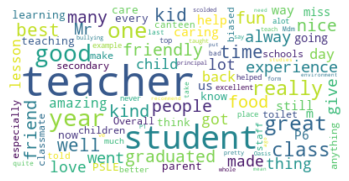

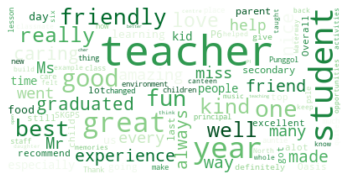

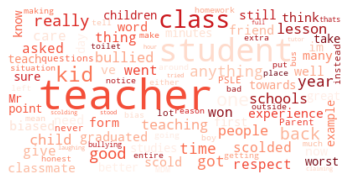

RESTAURANT


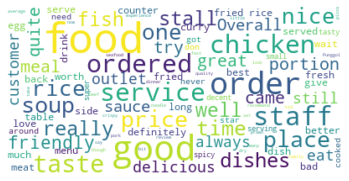

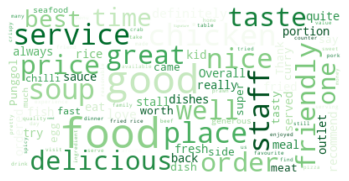

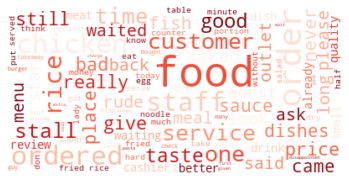

SECONDARY SCHOOL


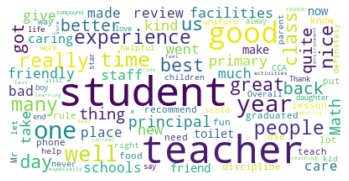

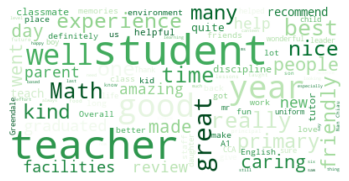

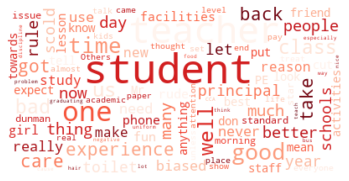

SHOPPING MALL


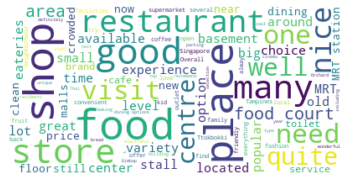

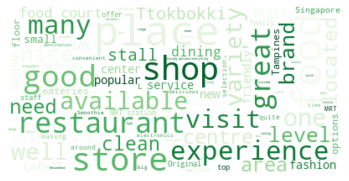

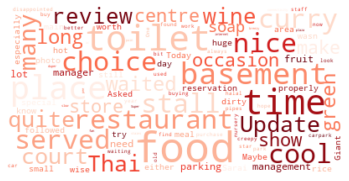

SUPERMARKET


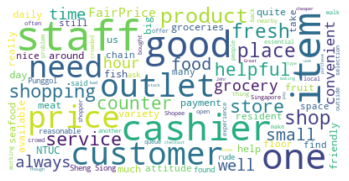

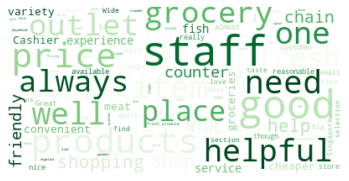

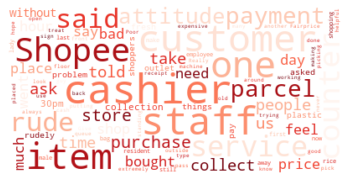

In [9]:
stopwords = list(set(STOPWORDS))
self_added_list = ['will','u','even','go','want','sch','s','sec','pri','come','dont','t','etc','see','must','n']

def show_word_cloud(text, stopwords, colormap=None):
    wordcloud = WordCloud(stopwords=stopwords+type_e.lower().split(' ')+self_added_list,colormap=colormap, max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    
for type_e in final_review_df.Type_Establishment.unique():

    filtered_final_review_df = final_review_df.query(f'Type_Establishment == "{type_e}"')
    type_e = type_e.replace('_',' ')
    print(type_e)
    sw = stopwords + type_e.lower().split(' ')
    
    text = ''.join([str(x) for x in list(filtered_final_review_df.text.values)])
    show_word_cloud(text, sw) 
    
    p_text = ''.join([str(x) for x in list(filtered_final_review_df.query('rating>4').text.values)])
    show_word_cloud(p_text, sw, 'Greens') 
    n_text = ''.join([str(x) for x in list(filtered_final_review_df.query('rating<3').text.values)])
    show_word_cloud(n_text, sw, 'Reds') 
    

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')# Compute sentiment labels


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}

In [31]:
sia = SentimentIntensityAnalyzer()
final_review_df['vader_output'] = final_review_df.text.apply(lambda x: sia.polarity_scores(x) if not(pd.isna(x)) else {})

In [28]:
final_review_df.vader_output.head().iloc[0]

{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9555}

In [45]:
final_review_df['pos'] = final_review_df['vader_output'].apply(lambda x: x.get('pos'))
final_review_df['neg'] = final_review_df['vader_output'].apply(lambda x: x.get('neg'))
final_review_df['neu'] = final_review_df['vader_output'].apply(lambda x: x.get('neu'))
final_review_df['Vader_Result'] = final_review_df['vader_output'].apply(lambda x: x.get('compound'))

Text(0.5, 1.0, 'Vader Sentiment Score vs User Rating')

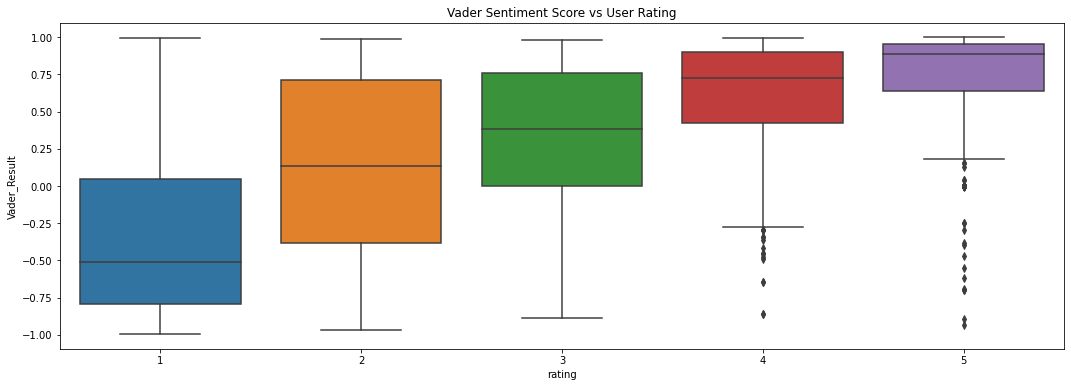

In [50]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=final_review_df[['Vader_Result','rating']], x='rating', y='Vader_Result', ax=ax)
plt.title('Vader Sentiment Score vs User Rating')

In [60]:
final_review_df.to_excel("Text_Analytics_Output.xlsx")

In [10]:
final_review_df = pd.read_excel("Text_Analytics_Output.xlsx")

In [11]:
final_review_pv = final_review_df.groupby('place_id').agg({'Vader_Result':['max','mean','median']}).reset_index()
final_review_pv.columns = ['place_id', 'Vader_Max','Vader_Mean','Vader_Median']


In [9]:
paths = """primary school.xlsx
Restaurant.xlsx
secondary school.xlsx
shopping_mall.xlsx
supermarket.xlsx""".split('\n')
location_df = []
for path in paths:
    temp_df = pd.read_excel(f'sample1-punggol/{path}')
    temp_df['Type_Establishment'] = path.replace('.xlsx','').upper()
    temp_df['path'] = path
    location_df.append(temp_df)
location_df = pd.concat(location_df)

In [12]:
merged_df = location_df.merge(final_review_pv, on='place_id')

In [17]:
env_df = merged_df.groupby('addr').agg({'rating':['max','mean','median'], 'Vader_Max':'max','Vader_Median':'median','Vader_Mean':'mean'}).reset_index()

In [18]:
env_df.columns=['addr','rating_max','rating_mean','rating_median','vader_max','vader_median','vader_mean']

In [87]:
env_df.to_excel('text_analytics_final_copy.xlsx',index=False)

In [88]:
env_df

,addr,rating_max,rating_mean,rating_median,vader_max,vader_median,vader_mean
0,101A PUNGGOL FIELD,5.0,3.905208,4.00,0.9988,0.54390,0.387252
1,101B PUNGGOL FIELD,5.0,3.971579,4.10,0.9988,0.65915,0.411150
2,101C PUNGGOL FIELD,5.0,3.971579,4.10,0.9988,0.65915,0.411150
3,101D PUNGGOL FIELD,5.0,3.932292,4.05,0.9988,0.64780,0.406830
4,102A PUNGGOL FIELD,5.0,3.907368,4.00,0.9988,0.64235,0.395691
...,...,...,...,...,...,...,...
452,683C EDGEDALE PLAINS,5.0,4.045918,4.10,0.9988,0.69080,0.436029
453,684A EDGEDALE PLAINS,5.0,4.036735,4.10,0.9988,0.69820,0.443121
454,684B EDGEDALE PLAINS,5.0,4.036735,4.10,0.9988,0.69820,0.443121
455,684C EDGEDALE PLAINS,5.0,4.045918,4.10,0.9988,0.69080,0.436029


In [75]:
merged_df

,business_status,formatted_address,name,place_id,rating,user_ratings_total,lat,long,source_lat,source_long,addr,Type_Establishment,path,Vader_Max,Vader_Min,Vader_Median,Rating_Max,Rating_Min,Rating_Median
0,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555,3.5,3.5,3.5
1,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.393236,103.910913,132 EDGEDALE PLAINS,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555,3.5,3.5,3.5
2,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.393482,103.912451,128A PUNGGOL FIELD WALK,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555,3.5,3.5,3.5
3,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.397249,103.907863,106B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555,3.5,3.5,3.5
4,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.403565,103.909175,614A EDGEFIELD PLAINS,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555,3.5,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,OPERATIONAL,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,4.5,319.0,1.392030,103.871184,1.402335,103.890958,232A SUMANG LANE,SUPERMARKET,supermarket.xlsx,0.9800,0.71482,0.8762,4.5,4.5,4.5
44408,OPERATIONAL,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,4.5,319.0,1.392030,103.871184,1.401497,103.890117,233A SUMANG LANE,SUPERMARKET,supermarket.xlsx,0.9800,0.71482,0.8762,4.5,4.5,4.5
44409,OPERATIONAL,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,4.5,319.0,1.392030,103.871184,1.402046,103.890067,232C SUMANG LANE,SUPERMARKET,supermarket.xlsx,0.9800,0.71482,0.8762,4.5,4.5,4.5
44410,OPERATIONAL,"455 Sengkang West Ave, #01-16 Fernvale Woods, ...",Sheng Siong Supermarket,ChIJ6Y8VDBUX2jER_4_UD9hStd8,4.5,319.0,1.392030,103.871184,1.401599,103.891245,233C SUMANG LANE,SUPERMARKET,supermarket.xlsx,0.9800,0.71482,0.8762,4.5,4.5,4.5


## Analysis Outliers

In [62]:
final_review_df = pd.read_excel("Text_Analytics_Output.xlsx")

In [70]:
final_review_df.query('rating == 5').sort_values(by='Vader_Result')[['text','Vader_Result']].iloc[1].to_dict()

{'text': 'I miss the noodle stall aunties. One of them v nice always give me a little extra egg the other auntie also okay but I js think that it’s because one auntie is so good that the one that’s normal gets hated on for not being so good, I genuinely think that aunties prob a nice person. On the other hand the teachers were okay ig… i was always scared of getting Mrs ang as my p6 teacher but I got Mrs or ms chew i forgot bro. Anyway Mrs or Ms Chew is arguably stricter but at least I the teacher changed after a while. why did they paint the school again it’s kinda meh. IM SO PISSED WHY GATE C THE BIG GATE NEVER OPEN ONE ONLY CAN USE THE TURNSTILE GATE!!!! It was probably for the kids safety BUT IM STILL MAD. I honestly would not want to live through this experience again. Unrelated but WHY AM I MORE STRESSED FOR MY EOYS RN THAN PSLE bye\n\nGo away why u read this entire review sia annoying',
 'Vader_Result': -0.8971}

# Geographic Plotting

In [6]:
MAPBOX_TOKEN = 'xxxx'

In [7]:
import plotly.express as px
import plotly.graph_objects as go

In [22]:
# Get a HDB Sample - 
sample = '203B PUNGGOL FIELD'

sample_df = merged_df.query(f'addr == "{sample}" & Type_Establishment == "PRIMARY SCHOOL"')

In [23]:
sample_df

,business_status,formatted_address,name,place_id,rating,user_ratings_total,lat,long,source_lat,source_long,addr,Type_Establishment,path,Vader_Max,Vader_Mean,Vader_Median
0,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.769020,0.9555
799,OPERATIONAL,"80 Rivervale Dr, Singapore 545092",Rivervale Primary School,ChIJnVhRDgUW2jERzmxuhCYAlso,3.5,45.0,1.393245,103.904399,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9796,-0.409960,-0.8936
1256,OPERATIONAL,"21 Compassvale St, Singapore 545091",Compassvale Primary School,ChIJezOWjg4W2jERhHhT9rwRPzU,4.2,43.0,1.394717,103.898105,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9806,0.645180,0.9259
1738,OPERATIONAL,"98 Punggol Walk, Singapore 828772",Punggol Green Primary School,ChIJcVLedeIV2jERvXfYPZ4-S40,4.5,51.0,1.401922,103.898827,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9863,0.541180,0.8856
2243,OPERATIONAL,"21 Edgedale Plains, Singapore 828867",Mee Toh School,ChIJu5S2iAMW2jERqXyv3Rg4EyU,3.7,78.0,1.394773,103.908952,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.0000,-0.385600,-0.3122
2941,OPERATIONAL,"71 Edgefield Plains, Singapore 828716",Oasis Primary School,ChIJYU2m3f4V2jERaulmckh3k2A,4.2,50.0,1.404225,103.911050,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9242,0.416700,0.7227
3398,OPERATIONAL,"21 Compassvale Walk, Singapore 545166",Seng Kang Primary School,ChIJkSU3DhEW2jERyZvUkYoWho8,4.1,55.0,1.389479,103.899931,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.7001,0.206120,0.4019
3855,OPERATIONAL,"9 Punggol Pl, Singapore 828845",Punggol View Primary School,ChIJU59Ij_wV2jERKi4TI1acUpY,4.2,42.0,1.405269,103.905189,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9625,0.710620,0.8885
4367,OPERATIONAL,"61 Edgedale Plains, Singapore 828819",Horizon Primary School,ChIJg-vjPwAW2jERvehflQPd39c,4.0,68.0,1.399830,103.913602,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9795,0.085140,0.0431
4971,OPERATIONAL,"49 Punggol Central, Singapore 828728",Valour Primary School,ChIJ9yPEV8UV2jERMMezRSaaE_U,4.3,11.0,1.406517,103.899510,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.8908,0.296933,0.0000


In [24]:
import numpy as np
from numpy import pi,sin,cos
r=2000
R = (180/pi)*r/6378137
center_lat = 1.39809
center_lon= 103.903683
t = np.linspace(0, 2*pi, 100)
circle_lon =center_lon + R*cos(t)
circle_lat =center_lat +  R*sin(t)


coords=[]
for lo, la in zip(list(circle_lon), list(circle_lat)):
    coords.append([lo, la]) 


In [25]:
import numpy as np
from numpy import pi,sin,cos
r=500
R = (180/pi)*r/6378137
center_lat = 1.39809
center_lon= 103.903683
t = np.linspace(0, 2*pi, 100)
circle_lon =center_lon + R*cos(t)
circle_lat =center_lat +  R*sin(t)


coords500=[]
for lo, la in zip(list(circle_lon), list(circle_lat)):
    coords500.append([lo, la]) 


In [26]:
sample_df.sort_values('name')

,business_status,formatted_address,name,place_id,rating,user_ratings_total,lat,long,source_lat,source_long,addr,Type_Establishment,path,Vader_Max,Vader_Mean,Vader_Median
8229,OPERATIONAL,"31 Anchorvale Dr, Singapore 544969",Anchor Green Primary School,ChIJNz0blm0W2jER1j2s44pL-Lw,3.8,59.0,1.390864,103.887118,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9916,0.971920,0.9815
1256,OPERATIONAL,"21 Compassvale St, Singapore 545091",Compassvale Primary School,ChIJezOWjg4W2jERhHhT9rwRPzU,4.2,43.0,1.394717,103.898105,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9806,0.645180,0.9259
0,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.769020,0.9555
6434,OPERATIONAL,"50 Edgedale Plains, Singapore 828848",Greendale Primary School,ChIJE3LmqtAX2jEReBt1NpyP9oM,3.9,11.0,1.396406,103.912561,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9949,0.284200,0.4391
4367,OPERATIONAL,"61 Edgedale Plains, Singapore 828819",Horizon Primary School,ChIJg-vjPwAW2jERvehflQPd39c,4.0,68.0,1.399830,103.913602,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9795,0.085140,0.0431
2243,OPERATIONAL,"21 Edgedale Plains, Singapore 828867",Mee Toh School,ChIJu5S2iAMW2jERqXyv3Rg4EyU,3.7,78.0,1.394773,103.908952,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.0000,-0.385600,-0.3122
7331,OPERATIONAL,"50 Anchorvale Link, Singapore 545080",Nan Chiau Primary School,ChIJtwM9qnIW2jERo4GosxkTgGE,4.0,70.0,1.392624,103.890428,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9761,0.397160,0.6982
5515,OPERATIONAL,"1 Rivervale St, Singapore 545088",North Spring Primary School,ChIJvbHdGhoW2jERI_CVwIDyBCw,3.9,38.0,1.387240,103.903599,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9972,0.958100,0.9600
8686,OPERATIONAL,"20 Compassvale Link, Singapore 544974",North Vista Primary School,ChIJPfi59RUW2jER10kPK44FGtU,4.4,50.0,1.382914,103.895813,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9884,0.576360,0.8360
2941,OPERATIONAL,"71 Edgefield Plains, Singapore 828716",Oasis Primary School,ChIJYU2m3f4V2jERaulmckh3k2A,4.2,50.0,1.404225,103.911050,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9242,0.416700,0.7227


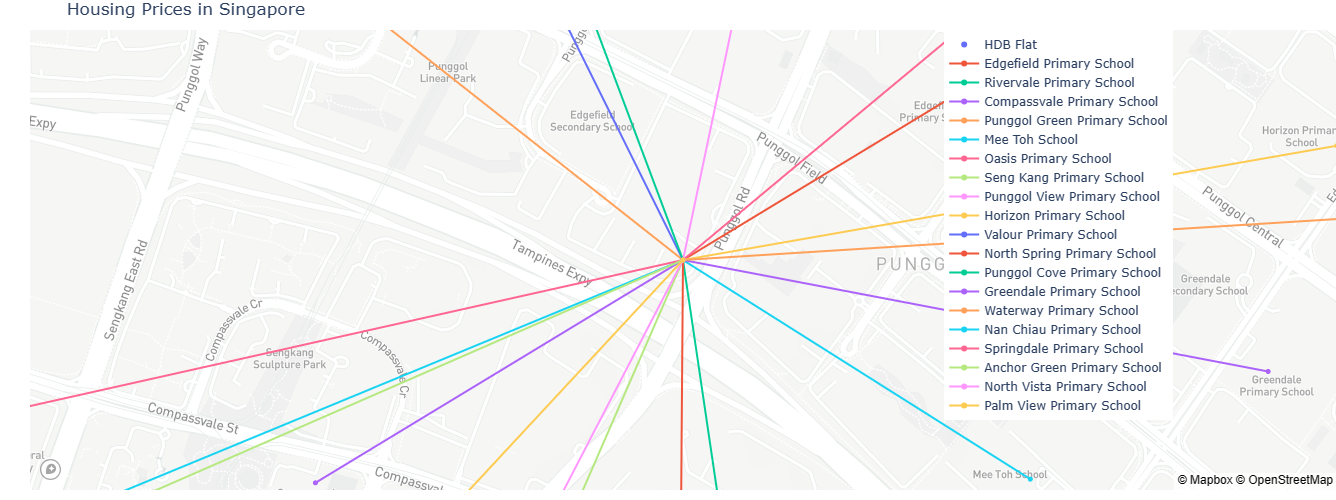

In [35]:
fig = go.Figure()

# Add Traces
fig.add_trace(go.Scattermapbox(lat = sample_df['source_lat'],lon = sample_df['source_long'],
        name = "HDB Flat", mode='markers',
        text = sample_df['addr']))

for idx,r in sample_df.iterrows():
    fig.add_trace(go.Scattermapbox(lat = [r['lat'], r['source_lat']],lon = [r['long'], r['source_long']],
            name = r['name'], mode='markers+lines',
            text = r['name']))



layers=[dict(sourcetype = 'geojson',
             source={ "type": "Feature",
                     "geometry": {"type": "LineString",
                                  "coordinates": coords
                                  }
                    },
             color=   'red',
             type = 'line',   
             line=dict(width=1.5)
            ), 
       dict(sourcetype = 'geojson',
             source={ "type": "Feature",
                     "geometry": {"type": "LineString",
                                  "coordinates": coords500
                                  }
                    },
             color=   'green',
             type = 'line',   
             line=dict(width=1.5)
            ), 
       
       ]

fig.update_layout(
    legend=dict(x=0.7, y=1.0, bgcolor = 'white'),
    title = 'Housing Prices in Singapore',
    width=1200, height=500,
    autosize = True,
    margin=dict(t=30, b=10, l=30, r=0),
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken= MAPBOX_TOKEN, # register an account with plotly and generate the API key
        bearing=0,
        # layers=layers,
        center=go.layout.mapbox.Center(lat=sample_df['source_lat'].iloc[0],lon=sample_df['source_long'].iloc[0]),pitch=0,zoom=15.5),
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            type = 'buttons',
            direction="right",pad={"r": 10, "t": 10},showactive=True,x=0.45,xanchor="left",y=1.12,yanchor="top"),])          
    
fig.show()

In [ ]:
fig = go.Figure()

# Add Traces
fig.add_trace(go.Scattermapbox(lat = df_recombine['LATITUDE'],lon = df_recombine['LONGITUDE'],
        name = "HDB Flat", mode='markers',
        text = sample_df['addr'])


fig.add_trace(go.Scattermapbox(lat = mrt_only['Latitude'],lon = mrt_only['Longitude'],mode='markers',
        name = "Train stations (exclude LRT)", text = mrt_only['STN_NAME'], 
                               marker = dict(color = 'black',size = 10,)))

fig.add_trace(go.Scattermapbox(lat = df_city['LATITUDE'],lon = df_city['LONGITUDE'],mode='markers',
        name = "City centre", text = df_city['city_centre'], 
                               marker = dict(color = 'red',size = 15,)))

fig.add_trace(go.Scattermapbox(lat = top_schs['LATITUDE'], lon = top_schs['LONGITUDE'], mode='markers',
                               name = "Top Schools", text = top_schs['address'] + ": " + "ranking->" + top_schs['ranking'].astype(str),
                               marker = dict(color = 'blue',size = 10)))

fig.add_trace(go.Scattermapbox(lat = hawker1['LATITUDE'],lon = hawker1['LONGITUDE'],mode='markers',
        name = "Hawker centres", text = hawker1['address'], 
                               marker = dict(color = 'lightgreen',size = 6,)))

# To create different tabs in the same graph

fig.update_layout(
    legend=dict(x=0.7, y=1.0, bgcolor = 'white'),
    title = 'Housing Prices in Singapore',
    autosize = True,
    margin=dict(t=30, b=10, l=30, r=0),
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken= 'plotly.APIkey', # register an account with plotly and generate the API key
        bearing=0,
        center=go.layout.mapbox.Center(lat=1.3448,lon=103.8224),pitch=0,zoom=10.5),
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            type = 'buttons',
            buttons=list([
                dict(label="Overview",method="update",
                     args=[{"visible": [True, False, False, False, False, True, True, True, True]},
                           {"title": "Housing Prices - All flats", "annotations": []}]),
                dict(label="3 Rooms",method="update",
                     args=[{"visible": [False, True, False, False, False, True, True, True, True]},
                           {"title": "Housing Prices - 3 Rooms", "annotations": []}]),
                dict(label="4 Rooms",method="update",
                     args=[{"visible": [False, False, True, False, False, True, True, True, True]},
                           {"title": "Housing Prices - 4 Rooms","annotations": []}]),
                dict(label="5 Rooms",method="update",
                     args=[{"visible": [False, False, False, True, False, True, True, True, True]},
                           {"title": "Housing Prices - 5 Rooms","annotations": []}]),
                dict(label="Executives",method="update",
                     args=[{"visible": [False, False, False, False, True, True, True, True, True]},
                           {"title": "Housing Prices - Executives","annotations": []}])]),
            direction="right",pad={"r": 10, "t": 10},showactive=True,x=0.45,xanchor="left",y=1.12,yanchor="top"),])          
    
fig.show()

In [20]:
sample_df

,business_status,formatted_address,name,place_id,rating,user_ratings_total,lat,long,source_lat,source_long,addr,Type_Establishment,path,Vader_Max,Vader_Mean,Vader_Median
0,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9741,0.76902,0.9555
457,OPERATIONAL,"41 Edgefield Plains, Singapore 828869",Edgefield Primary School,ChIJVykERAcW2jERjkryPev9iaY,3.5,47.0,1.400597,103.907809,1.398097,103.903683,203B PUNGGOL FIELD,SECONDARY SCHOOL,secondary school.xlsx,0.9741,0.76902,0.9555
799,OPERATIONAL,"80 Rivervale Dr, Singapore 545092",Rivervale Primary School,ChIJnVhRDgUW2jERzmxuhCYAlso,3.5,45.0,1.393245,103.904399,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9796,-0.40996,-0.8936
1256,OPERATIONAL,"21 Compassvale St, Singapore 545091",Compassvale Primary School,ChIJezOWjg4W2jERhHhT9rwRPzU,4.2,43.0,1.394717,103.898105,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9806,0.64518,0.9259
1738,OPERATIONAL,"98 Punggol Walk, Singapore 828772",Punggol Green Primary School,ChIJcVLedeIV2jERvXfYPZ4-S40,4.5,51.0,1.401922,103.898827,1.398097,103.903683,203B PUNGGOL FIELD,PRIMARY SCHOOL,primary school.xlsx,0.9863,0.54118,0.8856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41671,OPERATIONAL,"338 Anchorvale Cres, #01-11, Singapore 540338",Sheng Siong Supermarket,ChIJKfonHHUW2jERvM3RM77RSDQ,4.4,274.0,1.399163,103.889410,1.398097,103.903683,203B PUNGGOL FIELD,SUPERMARKET,supermarket.xlsx,0.9062,0.72552,0.8074
42095,OPERATIONAL,"660A Edgedale Plains, #01-01, Singapore 821660",Sheng Siong Supermarket (Edgedale Plains),ChIJHWbZRQA-2jERmnL_55STWM4,4.3,348.0,1.402545,103.916379,1.398097,103.903683,203B PUNGGOL FIELD,SUPERMARKET,supermarket.xlsx,0.8126,0.19940,0.1808
42515,OPERATIONAL,"215C Compassvale Drive, 01-01, 543215",U Stars Supermarket @ 215,ChIJY8m93RIW2jERzp_MpU1xStM,4.1,376.0,1.389960,103.892771,1.398097,103.903683,203B PUNGGOL FIELD,SUPERMARKET,supermarket.xlsx,0.6597,-0.10928,-0.2960
42706,OPERATIONAL,"351 Anchorvale Rd, #01-05, Singapore 540351",Sheng Siong Supermarket,ChIJtyVFlKMX2jERzI-QksGIDzk,4.3,551.0,1.393166,103.887104,1.398097,103.903683,203B PUNGGOL FIELD,SUPERMARKET,supermarket.xlsx,0.9842,0.53092,0.7717
